In [147]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [148]:
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')

In [149]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [150]:
df.shape

(1000, 9)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [152]:
df.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [153]:
df.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

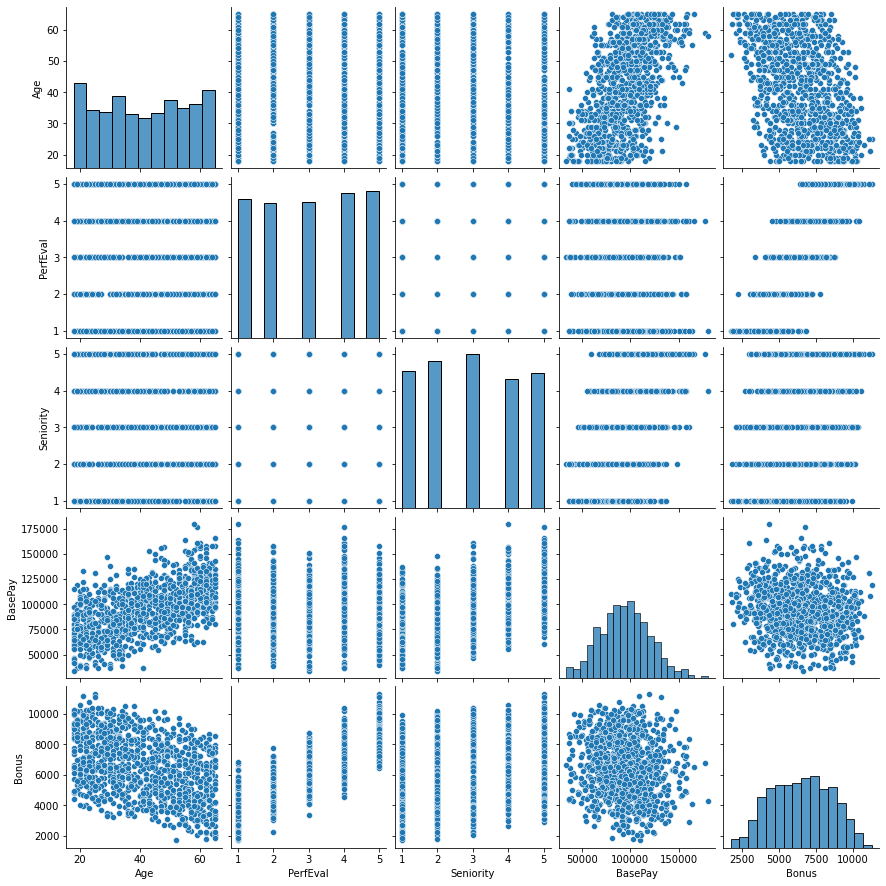

In [154]:
sns.pairplot(df)

# Data Exploration

In [155]:
df.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

# In this notebook, we will explore data mainly based on Gender 

In [156]:
# Job title and gender
Male_Job_Title = df.loc[df['Gender'] == 'Male', ['JobTitle', 'Gender']]
Male_Job_Title

,JobTitle,Gender
1,Software Engineer,Male
3,Software Engineer,Male
4,Graphic Designer,Male
7,Software Engineer,Male
10,Graphic Designer,Male
...,...,...
988,Sales Associate,Male
996,Data Scientist,Male
997,Financial Analyst,Male
998,Financial Analyst,Male


In [157]:
Female_JobTitle = df.loc[df['Gender']=='Female', ['JobTitle', 'Gender']]
Female_JobTitle

,JobTitle,Gender
0,Graphic Designer,Female
2,Warehouse Associate,Female
5,IT,Female
6,Graphic Designer,Female
8,Graphic Designer,Female
...,...,...
991,IT,Female
992,Graphic Designer,Female
993,Marketing Associate,Female
994,Marketing Associate,Female


In [158]:
Male_Job_Title.describe() # Male job title description

,JobTitle,Gender
count,532,532
unique,10,1
top,Software Engineer,Male
freq,101,532


In [159]:
Male_Job_Title['JobTitle'].value_counts() # Number of different Job Title taken by male

Software Engineer      101
Manager                 72
Financial Analyst       58
Data Scientist          54
Sales Associate         51
Graphic Designer        50
IT                      46
Driver                  45
Warehouse Associate     44
Marketing Associate     11
Name: JobTitle, dtype: int64

In [160]:
Male_Job_Count = Male_Job_Title['JobTitle'].value_counts() / Male_Job_Title['JobTitle'].value_counts().sum() * 100 #Percentage of job title for male
Male_Job_Count

Software Engineer      18.984962
Manager                13.533835
Financial Analyst      10.902256
Data Scientist         10.150376
Sales Associate         9.586466
Graphic Designer        9.398496
IT                      8.646617
Driver                  8.458647
Warehouse Associate     8.270677
Marketing Associate     2.067669
Name: JobTitle, dtype: float64

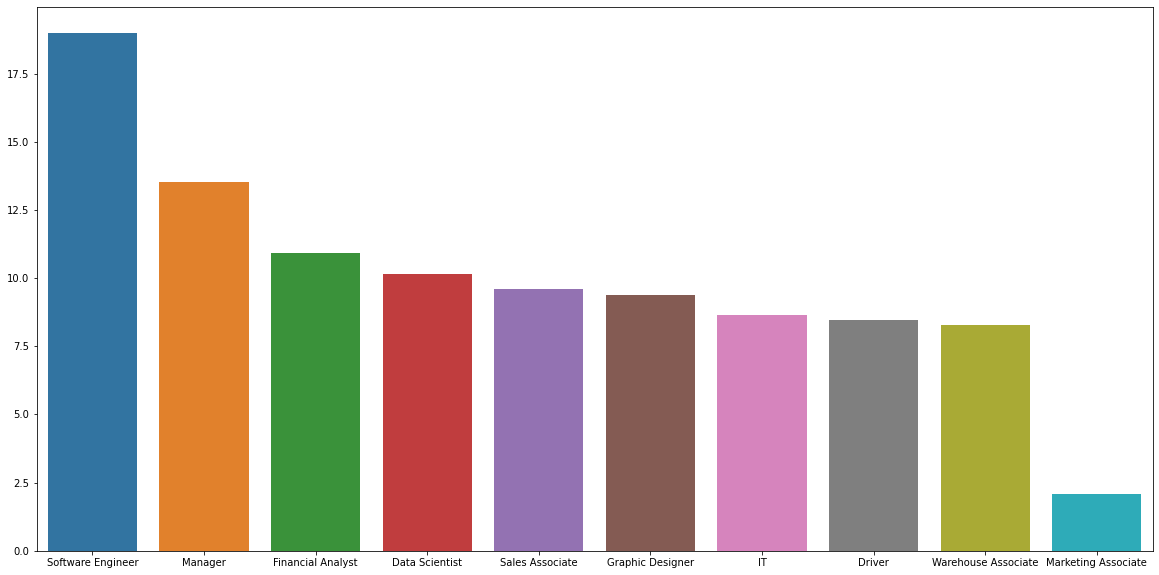

In [161]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = Male_Job_Count.index, y = Male_Job_Count.values)
plt.show()

In [162]:
Female_JobTitle.describe() #Female job description  

,JobTitle,Gender
count,468,468
unique,10,1
top,Marketing Associate,Female
freq,107,468


In [163]:
Female_JobTitle['JobTitle'].value_counts() #Quant. data for Female job title 

Marketing Associate    107
Data Scientist          53
IT                      50
Financial Analyst       49
Graphic Designer        48
Warehouse Associate     46
Driver                  46
Sales Associate         43
Manager                 18
Software Engineer        8
Name: JobTitle, dtype: int64

In [164]:
Female_Job_Count = Female_JobTitle['JobTitle'].value_counts() / Female_JobTitle['JobTitle'].value_counts().sum() * 100 #percentage of female employees based on job title 
Female_Job_Count


Marketing Associate    22.863248
Data Scientist         11.324786
IT                     10.683761
Financial Analyst      10.470085
Graphic Designer       10.256410
Warehouse Associate     9.829060
Driver                  9.829060
Sales Associate         9.188034
Manager                 3.846154
Software Engineer       1.709402
Name: JobTitle, dtype: float64

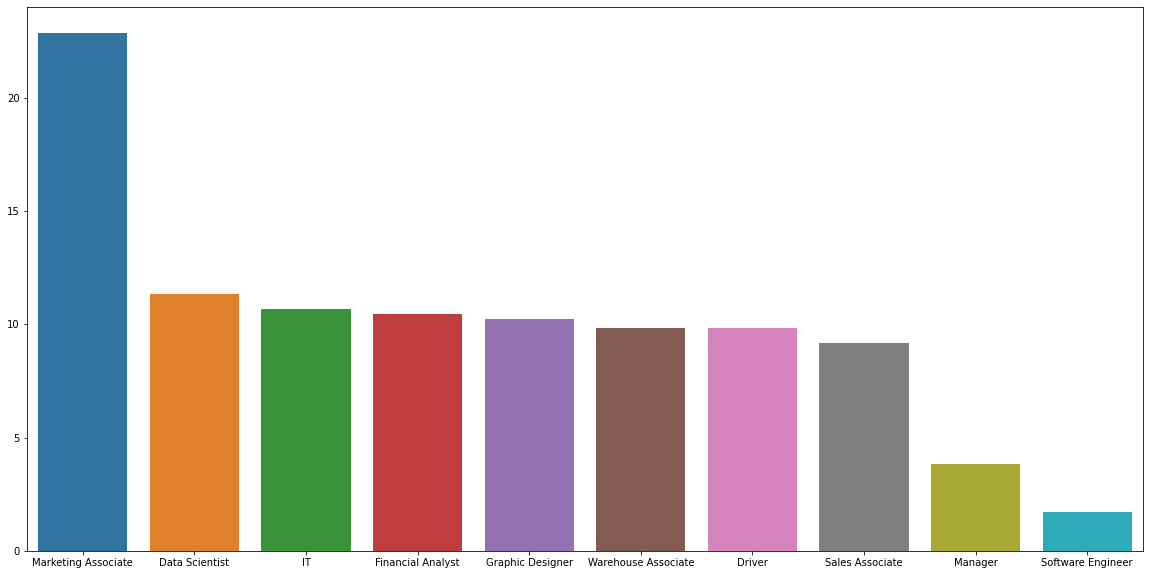

In [165]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=Female_Job_Count.index, y = Female_Job_Count.values, ax=ax)
plt.show()

# Observation
According to the data, a larger proportion of females (22.86%) work as Marketing Associates compared to Software Engineers (1.71%), whereas a larger proportion of males (18.9%) work as Software Engineers compared to Marketing Associates (2.07%). The job titles held by males and females appear to be inversely related, which could potentially introduce bias into the data, as different job titles often come with different salaries. Generally, Software Engineers tend to earn higher salaries compared to Marketing Associates. 

### As of September 2021, the U.S. Bureau of Labor Statistics reported the following national average salaries for these positions:

<li>Marketing Associate: $69,280 per year
<li>Data Scientist: $104,690 per year
<li>IT (Computer and Information Technology Occupations): $93,320 per year
<li>Financial Analyst: $85,660 per year
<li>Graphic Designer: $57,430 per year
<li>Warehouse Associate: $31,050 per year
<li>Driver: $37,280 per year
<li>Sales Associate: $31,350 per year
<li>Manager: $122,530 per year
<li>Software Engineer: $110,140 per year

### Let's look at Salary gap based on gender for different positions

In [166]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [167]:
df['TotalSalary'] = df['BasePay'] + df['Bonus'] #created a new column that adds both bonuses and total salary

In [168]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalSalary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [169]:
Female_Salary = df.loc[df['Gender']=='Female', ['JobTitle', 'TotalSalary']]
Female_Salary

,JobTitle,TotalSalary
0,Graphic Designer,52301
2,Warehouse Associate,99476
5,IT,81016
6,Graphic Designer,78126
8,Graphic Designer,122812
...,...,...
991,IT,108986
992,Graphic Designer,84963
993,Marketing Associate,82673
994,Marketing Associate,88030


In [173]:
Male_Salary = df.loc[df['Gender']=='Male', ['JobTitle', 'TotalSalary']]
Male_Salary


,JobTitle,TotalSalary
1,Software Engineer,119604
3,Software Engineer,118234
4,Graphic Designer,108783
7,Software Engineer,107763
10,Graphic Designer,112473
...,...,...
988,Sales Associate,104416
996,Data Scientist,112544
997,Financial Analyst,95071
998,Financial Analyst,99601


In [174]:
Female_Salary = df.loc[df['Gender']=='Female', ['JobTitle', 'TotalSalary']]
Female_Salary

,JobTitle,TotalSalary
0,Graphic Designer,52301
2,Warehouse Associate,99476
5,IT,81016
6,Graphic Designer,78126
8,Graphic Designer,122812
...,...,...
991,IT,108986
992,Graphic Designer,84963
993,Marketing Associate,82673
994,Marketing Associate,88030


In [185]:
Female_Salary = df['Gender']=='Female', ['TotalSalary']
Female_Salary

(0       True
 1      False
 2       True
 3      False
 4      False
        ...  
 995     True
 996    False
 997    False
 998    False
 999    False
 Name: Gender, Length: 1000, dtype: bool,
 ['TotalSalary'])

TypeError: unhashable type: 'numpy.ndarray'

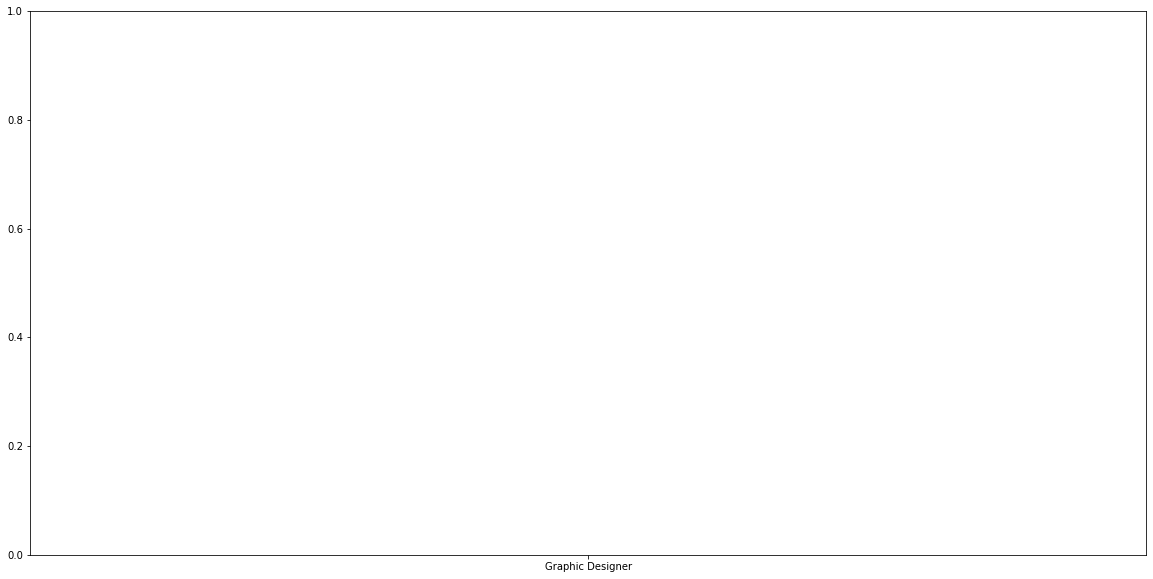

In [183]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df['JobTitle'], Male_Salary, label='Male', color='blue')
ax.bar(df['JobTitle'], Female_Salary, label='Female', color='red')
plt.show()